### Team ID : PNT2022TMID32265

# Customer Segmentation Analysis

#### Clustering the data and performing classification algorithms

 ## 1. Download the dataset:

In [43]:
# yes completed.....

In [85]:
# importing the modules...

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load the dataset into the tool.

In [86]:
df=pd.read_csv("C:\\Users\\Mytheswaran\\IBM\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
# shape
df.shape

(200, 5)

In [88]:
# drop the customerID column ....

In [89]:
df = df.drop(columns=["CustomerID"],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 3. Perform Below Visualizations.

## • Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


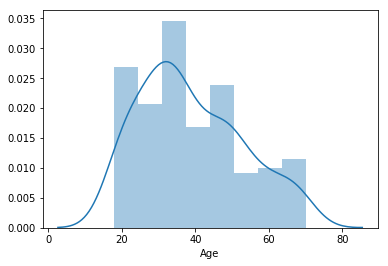

In [96]:
#univarient Analysis

sns.distplot(df['Age'],kde=True)       # Choosing Age column

## •Bi-Variate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


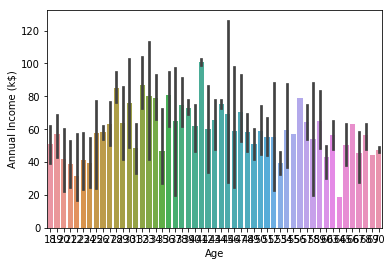

In [97]:
#bivariate analysis 

sns.barplot(x=df.Age,y=df['Annual Income (k$)'])    # Choosing Age and Annual Income (k$)

## • Multi-Variate Analysis

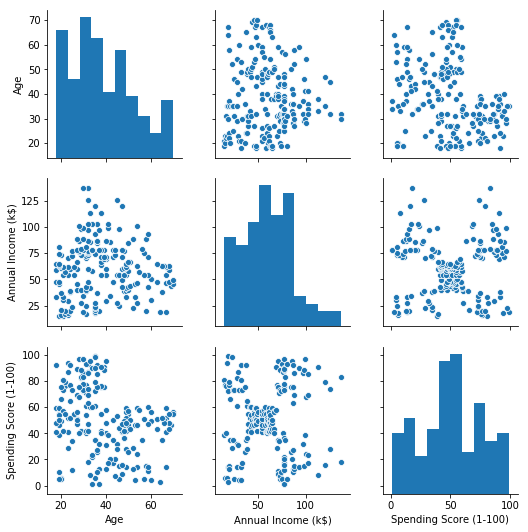

In [98]:
# Multi-Variate Analysis

sns.pairplot(df)

## 4. Perform descriptive statistics on the dataset.

In [99]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## 5. Check for Missing values and deal with them.

In [100]:
df.isnull().any()      # to check any null 

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [101]:
df.isnull().sum()      # to check the count of null  

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [102]:
# there is no missing values so we go for next step.....

## 6. Find the outliers and replace them outliers

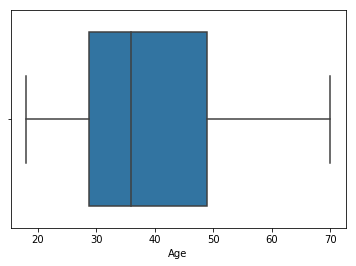

In [104]:
# outlier in Age column

sns.boxplot(df.Age)

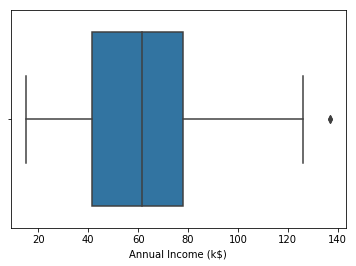

In [105]:
# outlier in Annual Income (k$) column

sns.boxplot(df['Annual Income (k$)'])

In [106]:
df['Annual Income (k$)'].median()                           # median....

61.5

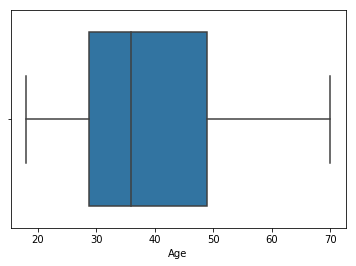

In [107]:
q1=df['Annual Income (k$)'].quantile(0.25)  #(Q1)           # Replacement using median....
q3=df['Annual Income (k$)'].quantile(0.75)  #(Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

df['Annual Income (k$)']= np.where(df['Annual Income (k$)']>upper_limit,61,df['Annual Income (k$)'])
sns.boxplot(x=df.Age,showfliers=False)

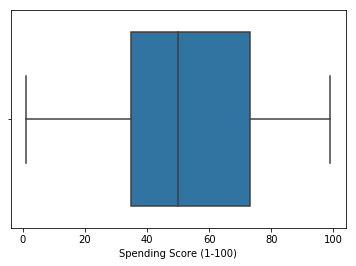

In [108]:
# outlier in Spending Score (1-100) column

sns.boxplot(df['Spending Score (1-100)'])

## 7. Check for Categorical columns and perform encoding

## • Label encoding

In [109]:
from sklearn.preprocessing import LabelEncoder        # Using Label encoding....
le=LabelEncoder()

df.Gender=le.fit_transform(df.Gender)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## 8. Scaling the data

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918]])

## 9. Perform any of the clustering algorithms

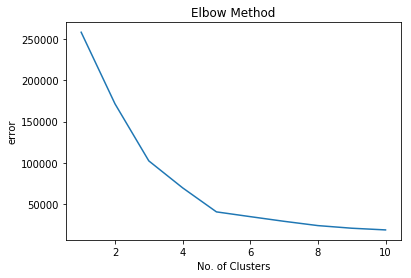

In [111]:
target = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

error = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(target)
    error.append(km.inertia_)

plt.plot(range(1, 11), error)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('error')
plt.show()

In [112]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = k_means.fit_predict(target)

In [113]:
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [114]:
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## 10. Add the cluster data with the primary dataset

In [115]:
df['Outcome'] = pd.Series(y_means)

In [116]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Outcome
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


## 11. Split the data into dependent and independent variables.

## ( i ) Independent variable

In [117]:
x=df.drop(columns=['Outcome'],axis = 1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## ( ii ) Dependent variable

In [118]:
y = df.Outcome
y.head()

0    3
1    4
2    3
3    4
4    3
Name: Outcome, dtype: int32

## 12. Split the data into training and testing

In [119]:
# train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [120]:
x_train.shape

(160, 4)

In [121]:
x_test.shape

(40, 4)

In [122]:
y_train.shape

(160,)

In [123]:
y_test.shape

(40,)

## 13. Build the Model

In [124]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [125]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
y_predict = model.predict(x_test)

In [127]:
y_predict_train = model.predict(x_train)

## 14. Train the Model

In [128]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [129]:
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))

Training accuracy:  0.99375


## 15. Test the Model

In [130]:
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Testing accuracy:  1.0


## 16. Measure the performance using Metrics

In [131]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4
Outcome,,,,,
0,12,0,0,0,0
1,0,17,0,0,0
2,0,0,5,0,0
3,0,0,0,3,0
4,0,0,0,0,3


In [132]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      1.00      1.00        17
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        40

